In [50]:
import numpy as np
import pandas as pd

from sklearn.tree import (
    DecisionTreeClassifier, 
    DecisionTreeRegressor, 
    plot_tree
)
from sklearn.preprocessing import OrdinalEncoder
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

## Classificação

In [19]:
df_classif = pd.read_csv('play_tennis.csv')
df_classif.head(3)

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes


In [27]:
# Convertendo categorias em números
oe = OrdinalEncoder(
    categories = [['rainy', 'overcast', 'sunny'],
                ['cool', 'mild', 'hot'],
                ['normal', 'high'],
                [False, True],
                ['no', 'yes']
               ],
    dtype = 'int32'
)

# Encaixando
oe.fit(df_classif)

OrdinalEncoder(categories=[['rainy', 'overcast', 'sunny'],
                           ['cool', 'mild', 'hot'], ['normal', 'high'],
                           [False, True], ['no', 'yes']],
               dtype='int32')

In [28]:
# Criando o DataFrame a partir dos dados
df_num = pd.DataFrame(
    data = oe.transform(df_classif),
    columns = df_classif.columns
)

df_num.head(3)

,outlook,temp,humidity,windy,play
0,2,2,1,0,0
1,2,2,1,1,0
2,1,2,1,0,1


In [32]:
# Separando para predição
X = df_num.drop(['play'], axis=1)
y = df_num['play']

In [33]:
# Criando a decision tree
dt = DecisionTreeClassifier(max_depth=2)

# Treinando o modelo
dt.fit(X,y)

DecisionTreeClassifier(max_depth=2)

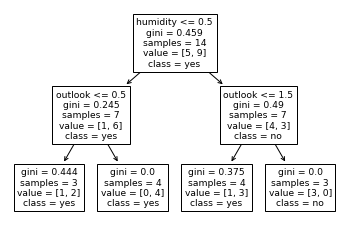

In [43]:
# Exibindo a árvore gerada
_ = plot_tree(
    dt, 
    feature_names=X.columns,
    class_names=['no', 'yes']
)

## Testando no Iris

In [95]:
# Carregando
X, y = load_iris(return_X_y=True)
dataset = load_iris()

In [96]:
# Dividindo a base
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.4,
    random_state=42 
)

len(X_train), len(X_test)

(90, 60)

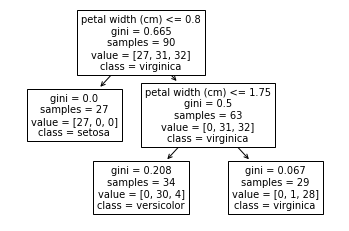

In [97]:
# Criando a árvore
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(X_train, y_train)
_ = plot_tree(
    dt,
    feature_names=dataset.feature_names,
    class_names=dataset.target_names
)

In [89]:
# Predizendo valores
y_pred = dt.predict(X_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 1, 2, 1, 2, 1, 2, 1, 0, 2, 1, 0, 0, 0, 1])

In [90]:
# Testando erros e acertos
np.mean(y_test == y_pred) 

0.9833333333333333

In [99]:
# Testando probabilidades
dt.predict_proba(X_test)

array([[0.        , 0.88235294, 0.11764706],
       [1.        , 0.        , 0.        ],
       [0.        , 0.03448276, 0.96551724],
       [0.        , 0.88235294, 0.11764706],
       [0.        , 0.88235294, 0.11764706],
       [1.        , 0.        , 0.        ],
       [0.        , 0.88235294, 0.11764706],
       [0.        , 0.03448276, 0.96551724],
       [0.        , 0.88235294, 0.11764706],
       [0.        , 0.88235294, 0.11764706],
       [0.        , 0.03448276, 0.96551724],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.88235294, 0.11764706],
       [0.        , 0.03448276, 0.96551724],
       [0.        , 0.88235294, 0.11764706],
       [0.        , 0.88235294, 0.11764706],
       [0.        , 0.03448276, 0.96551724],
       [1.        , 0.        , 0.        ],
       [0.        , 0.03448276, 0.96551724],
       [1.